# Introduction
The pipeline is as follows:
- Step 1) Scraping the IEM measurements
- Step 2) Grouping the measurements based off the IEM
- Step 3) Calculating average measurements
- Step 4) Calculating predicted preference percentage
- Step 5) Ploting the highest ranking IEM's

### Step 1)
Scraping the IEM measurements and coverting to .csv files with only X and Y columns

In [1]:
#import re
#import requests
#from bs4 import BeautifulSoup
#import os
#import time
#import random
#from urllib.parse import unquote

In [2]:
## List of reviewer whose squig.links will be scraped
#reviewer_sites = [
#    ('achoreviews', False)
#    ('aftersound', False)
#    ('animagus', False)
#    ('arn', False)
#    ('bedrock', False)
#    ('bryaudioreviews', False)
#    ('cammyfi', False)
#    ('soundjedi', False)
#    ('eplv', False)
#    ('timmyv', False)
#    ('harpo', False)
#    ('hbb', False)
#    ('cqtek', False)
#    ('hobbytalk', False)
#    ('ianfann', False)
#    ('iemworld', False)
#    ('jacstone', False)
#    ('kr0mka', False)
#    ('kurin', False)
#    ('melatonin', False)
#    ('nymz',  False)
#    ('pw', False)
#    ('recode', False)
#    ('rg', False)
#    ('shortbus', False)
#    ('suporsalad', False)
#    ('tgx78', False)
#    ('vortexreviews', False)
#    ('vsg', False)
#    ('wdym', False)
#    ('akros', False)
#    ('freeryder05', False)
#    ('precogvision', False)
#    ('data_mrs', True)
#     
#]
#
## Print number of reviewers
#print(f'Number of reviewer sites: {len(reviewer_sites)}')

In [3]:
## Define function to preprocess and convert to CSV
#def preprocess_and_convert_to_csv(input_file, output_file):
#    # Open input and output files
#    with open(input_file, 'r', errors='replace') as infile, open(output_file, 'w') as outfile:
#        outfile.write("X,Y\n")  # Write header
#        for line in infile: # Iterate over lines in input file
#            if re.match(r'^\d', line):  # Check if the line starts with a digit
#                if ',' in line:  # Check if the line is already in CSV format
#                    outfile.write(line)
#                else:
#                    freq, spl, *_ = line.split()  # Extract frequency and SPL values
#                    outfile.write(f"{freq},{spl}\n")  # Write to output file

In [4]:
## Iterate over reviewer sites
#for site_tuple in reviewer_sites:
#    # Extract site name and whether it is a special case
#    # Special cases are sites that have a different URL structure 
#    # Such as data_mrs
#    site, is_special_case = site_tuple
#    
#    if is_special_case:
#        base_url = 'https://squig.link/data_mrs/'
#    else:
#        base_url = f'https://{site}.squig.link/data/'  
#
#    # Set headers to avoid connection issues
#    headers = {
#    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
#    'Referer': 'https://squig.link/'
#    }
#
#    # Make request to site
#    response = requests.get(base_url, headers=headers)
#
#    # Check if connection is successful if not print error code
#    if response.status_code == 200:
#        print('Successful connection.\n')
#    else:
#        print(f'Error: {response.status_code} {response.reason}')
#
#    # Parse HTML response with BeautifulSoup
#    soup = BeautifulSoup(response.text, 'html.parser')
#
#    # Find all links that end with .txt
#    links = soup.find_all('a')
#
#    # Extract all .txt links
#    txt_links = [link.get('href') for link in links if link.get('href').endswith('.txt')]
#
#    # Create folders for each reviewer site, 
#    # Both a folder for the txt files and a folder for the processed csv files
#    save_folder = f'output/txt/{site}'
#    if not os.path.exists(save_folder):
#        os.makedirs(save_folder)
#    
#    csv_save_folder = f'output/csv/{site}'
#    if not os.path.exists(csv_save_folder):
#        os.makedirs(csv_save_folder)
#        
#    # Iterate over all txt links
#    for txt_link in txt_links:
#        # Decode the link to get the file name
#        decoded_txt_link = unquote(txt_link)
#        # Create file names for the txt and csv files
#        file_name = os.path.join(save_folder, decoded_txt_link)
#        # Replace .txt with .csv to convert to csv
#        csv_file_name = os.path.join(csv_save_folder, decoded_txt_link.replace('.txt', '.csv'))
#
#        # Download the file and save it to the txt folder, print status
#        with open(file_name, 'wb') as f:
#            file_response = requests.get(base_url + txt_link, headers=headers)
#            f.write(file_response.content)
#        print(f'Downloaded {file_name}')
#
#        # Preprocess and convert to csv, print status
#        preprocess_and_convert_to_csv(file_name, csv_file_name)
#        print(f'Converted {file_name} to {csv_file_name}')
#
#        # Delay for 1 second, plus a random value between -0.5 and 0.5 seconds
#        # To avoid overloading the server
#        time.sleep(0.5 + random.uniform(-0.25, 0.25))  
#

### Step 2)
Grouping the .csv files so that all the measurements for a given IEM are grouped together.

In order to achieve this, a manually labeled list of IEM's and their respective name variations is used.

In [5]:
import os
import re
import pandas as pd

In [6]:
# The list of all reviewers
reviewers = [
    'achoreviews',
    'aftersound',
    'animagus',
    'arn',
    'bedrock',
    'bryaudioreviews',
    'cammyfi',
    'soundjedi',
    'eplv',
    'timmyv',
    'harpo',
    'hbb',
    'cqtek',
    'hobbytalk',
    'ianfann',
    'iemworld',
    'jacstone',
    'kr0mka',
    'kurin',
    'melatonin',
    'nymz', 
    'pw',
    'recode',
    'rg',
    'shortbus',
    'suporsalad',
    'tgx78',
    'vortexreviews',
    'vsg',
    'wdym',
    'akros',
    'data_mrs'
    #'freeryder05',
    #'precogvision'
]

In [7]:
# Replace double backslashes with single forward slashes in file paths
def fix_file_path(file_path):
    return file_path.replace("\\", "/")

In [8]:
# Read the data from the .csv file
def read_iem_list(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # Parse the content of the .txt file using regex to get the iem_list 
    iem_list = {}
    pattern = re.compile(r"'(.*?)' : \[(.*?)\]")
    matches = pattern.findall(content)

    # Iterate over the matches and extract the iem and variations
    for iem, variations in matches:
        # Remove whitespace
        iem = iem.strip()
        # Split the variations by comma
        variations = [v.strip() for v in variations.split(',')]
        # Add the iem and variations to the iem_list
        iem_list[iem] = variations

    return iem_list

# Read the iem_list from the .txt file
iem_list = read_iem_list('IEM Lists/output.txt')

In [9]:
# Gets the list of all the csv files
def get_csv_files():
    # Creates a list of all the csv files
    csv_files = []
    # Iterates through all the reviewers
    for reviewer in reviewers:
        # Gets the path of the reviewer
        path = os.path.join("output/csv", reviewer)
        # Iterates through all the files in the path
        for file in os.listdir(path):
            # Checks if the file is a csv file
            if file.endswith(".csv"):
                # Adds the file to the list
                csv_files.append(os.path.join(path, file))
                
    return csv_files

In [10]:
def process_filename(filename):
    # Remove file extension
    filename = os.path.splitext(filename)[0]
    
    # Convert to lowercase
    filename = filename.lower()
    
    # Remove text in brackets (round, square, and curly)
    filename = re.sub(r'(\[.*?\]|\{.*?\}|\(.*?\))', '', filename)
    
    # Remove trailing L or R
    filename = re.sub(r'[lr]$', '', filename)
    
    # Strip leading and trailing whitespaces
    filename = filename.strip()

    return filename

In [11]:
def group_by_iem(csv_files):
    
    grouped_files = {}

    # Sort the variations in descending order of their length
    # This is to ensure that the longest variations are matched first
    for iem in iem_list:
        iem_list[iem].sort(key=len, reverse=True)

    # Sort the IEM list keys by their length in descending order
    # This is to ensure that the longest IEMs are matched first
    sorted_iem_list = sorted(iem_list.keys(), key=len, reverse=True)

    # Iterate through all the csv files
    for filepath in csv_files:
        filename = os.path.basename(filepath)
        processed_name = process_filename(filename)

        # Iterate through the sorted IEM list keys
        for iem_key in sorted_iem_list:
            variations = iem_list[iem_key]

            for variation in variations:
                # Escape the '+' character in variation
                escaped_variation = variation.replace('+', r'\+')

                # Use regex to match the beginning of the processed file name
                if re.match(f"^{escaped_variation}( |$)", processed_name):
                    if iem_key not in grouped_files:
                        grouped_files[iem_key] = []
                    grouped_files[iem_key].append(filepath)
                    break
            else:
                continue
            break

    # Sort the final dictionary alphabetically (case-insensitive) by the keys
    sorted_grouped_files = {key: grouped_files[key] for key in sorted(grouped_files, key=lambda k: k.lower())}

    return sorted_grouped_files


In [12]:
# Create a list of dictionaries for each IEM
def create_iem_dicts(grouped_files):
    
    iem_dicts = []
    
    # Iterate through the grouped files
    for iem, files in grouped_files.items():
        iem_dict = {'IEM': iem, 'Files': files}
        iem_dicts.append(iem_dict)
        
    return iem_dicts

# Get the list of csv files
csv_files = get_csv_files()

# Group the csv files by IEM
grouped_files = group_by_iem(csv_files)

# Create a list of dictionaries for each IEM
iem_dicts = create_iem_dicts(grouped_files)

# Print the list of dictionaries
print(iem_dicts)

[{'IEM': '1Custom Apex Ti', 'Files': ['output/csv\\recode\\apexti L.csv', 'output/csv\\recode\\apexti R.csv']}, {'IEM': '1Custom PM01', 'Files': ['output/csv\\hobbytalk\\1 Custom PM-01 L.csv', 'output/csv\\hobbytalk\\1 Custom PM-01 R.csv']}, {'IEM': '1MORE ColorBuds 2', 'Files': ['output/csv\\vsg\\1MORE ColorBuds 2 L.csv', 'output/csv\\vsg\\1MORE ColorBuds 2 R.csv']}, {'IEM': '1MORE ComfoBuds Pro', 'Files': ['output/csv\\eplv\\1More ComfoBudsPro L.csv', 'output/csv\\eplv\\1More ComfoBudsProOff L.csv', 'output/csv\\eplv\\1More ComfoBudsProOff R.csv']}, {'IEM': '1MORE Evo', 'Files': ['output/csv\\vsg\\1MORE EVO L.csv', 'output/csv\\vsg\\1MORE EVO R.csv']}, {'IEM': '1MORE Piston Classic', 'Files': ['output/csv\\eplv\\1More PistonClassic L.csv', 'output/csv\\eplv\\1More PistonClassic R.csv']}, {'IEM': '1MORE Quad Driver', 'Files': ['output/csv\\iemworld\\1MORE Quad Driver L.csv', 'output/csv\\iemworld\\1MORE Quad Driver R.csv', 'output/csv\\kurin\\Oratory 1MORE Quad Driver L.csv']}, {'IEM'

In [13]:
# Count the total number of files
total_files = len(csv_files)

# Count the total number of groups (IEMs)
total_groups = len(iem_dicts)

# Count the total number of files in groups
files_in_groups = sum([len(d['Files']) for d in iem_dicts])

# Calculate the total number of files not in groups
files_not_in_groups = total_files - files_in_groups

# Calculate the average number of files per group
avg_files_per_group = files_in_groups / total_groups

In [14]:
# Print the stats
print(f"Total number of files: {total_files}")
print(f"Total number of groups: {total_groups}")
print(f"Total number of files in groups: {files_in_groups}")
print(f"Total number of files not in groups: {files_not_in_groups}")
print(f"Average number of files per group: {avg_files_per_group:.2f}")

Total number of files: 9882
Total number of groups: 1274
Total number of files in groups: 7452
Total number of files not in groups: 2430
Average number of files per group: 5.85


In [15]:
# Find and print the file paths of files not in groups
grouped_file_paths = [file for d in iem_dicts for file in d['Files']]
files_not_grouped = [file for file in csv_files if file not in grouped_file_paths]

# Print the sorted unique files not in groups
print("\nSorted unique files not in groups:\n")
# Create a set to store the processed filenames
seen = set()
# Sort the files not in groups by their processed filenames
sorted_files_not_grouped = sorted(files_not_grouped, key=lambda x: process_filename(os.path.basename(x)).lower())
# Iterate through the sorted files not in groups
for file in sorted_files_not_grouped:
    # Get the processed filename
    file_basename = os.path.basename(file)
    # Check if the processed filename has been seen before
    processed_file = process_filename(file_basename)
    # Print the processed filename if it has not been seen before and add it to the set
    if processed_file not in seen:
        print(processed_file)
        seen.add(processed_file)


Sorted unique files not in groups:

32bg
55hz 03xx
55hz 1
55hz 350
55hz 3d
55hz b
55hz eki
55hz eki fil fo
55hz eki tune
55hz fo
55hz hbb m
55hz hbb maka
55hz hok
55hz mystery
55hz no damp
55hz os
55hz osummer
55hz osun sil
55hz p1 foam
55hz p1 sil
55hz p2
55hz qk
55hz qkz foa
55hz qkz sil
55hz r
55hz secretz 429
55hz see
55hz sil
55hz ss
55hz st
55hz t
55hz x hbb kai
7a pro1stock
7hz sample
7hz sample med
7hz sample sha
7hz sample shal
a2
aful new
aful soloist
agent 007
agent 008
akros erasmus
anole vx 003
anole vx 020
anole vx 100
arere
audiosense dt300+36
audiosense dt300+75
avid
blon aa
blon bl03v2 stock
blon bl05sv2
blon bl05v2
bonus ie pro
bt
cca ca16v2
ccz coffee beanv2
ccz coffeebean
dkm
dm2_dm1
dm2_eqmdm1
dm2_olina
du b
edifier neobuds pro
enco x2 - punchy
enco x2 - real
enco x2 - simple and clear
enco x2 eq classic
enco x2 eq punchy
enco x2 eq real
enco x2 eq simple & clear
fd5
foam and 450
goldpla filt 2
graph x
gs audio se12b
harman 2017 target
harman 2017v2 target
harman 

In [16]:
# Create a dataframe from the list of dictionaries
iem_dicts_df = pd.DataFrame(iem_dicts)

In [17]:
# Print the dataframe
iem_dicts_df

,IEM,Files
0,1Custom Apex Ti,"[output/csv\recode\apexti L.csv, output/csv\re..."
1,1Custom PM01,"[output/csv\hobbytalk\1 Custom PM-01 L.csv, ou..."
2,1MORE ColorBuds 2,"[output/csv\vsg\1MORE ColorBuds 2 L.csv, outpu..."
3,1MORE ComfoBuds Pro,"[output/csv\eplv\1More ComfoBudsPro L.csv, out..."
4,1MORE Evo,"[output/csv\vsg\1MORE EVO L.csv, output/csv\vs..."
...,...,...
1269,Xingshenglong DIY E3000,"[output/csv\eplv\DIY E3000 L.csv, output/csv\e..."
1270,Xingshenglong DIY E4000,"[output/csv\eplv\DIY E4000 L.csv, output/csv\e..."
1271,XINHS Erasmus,"[output/csv\harpo\Erasmus 00 R.csv, output/csv..."
1272,Yanyin Canon,[output/csv\tgx78\Canon L.csv]


In [18]:
# Save the dataframe to a csv file
iem_dicts_df.to_csv('output/iem_dicts.csv', index=False)

### Step 3)
Calculating the average measurements, saving them as new .csv files and adding them to the dataframe

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import os
import re

In [87]:
def read_and_interpolate(file_path, x_values):
    df = pd.read_csv(file_path)
    
    # Group data points by the same X-value and take the mean of their Y-values
    df = df.groupby('X', as_index=False).mean()
    
    min_x = df['X'].min()
    max_x = df['X'].max()
    x_values_interp = x_values[(x_values >= min_x) & (x_values <= max_x)]
    f = interp1d(df['X'], df['Y'], kind='linear', fill_value='extrapolate')
    y_values = np.empty_like(x_values)
    y_values[:] = np.nan
    y_values[(x_values >= min_x) & (x_values <= max_x)] = f(x_values_interp)
    return y_values

In [88]:
def find_mean_in_range(data, x_values, x_min, x_max):
    indices = (x_values >= x_min) & (x_values <= x_max)
    return np.mean(data[indices])

In [89]:
def calculate_average(file_paths, output_path):
    # X values to interpolate to (logarithmically spaced from 20 Hz to 20 kHz)
    x_values = np.logspace(np.log10(20), np.log10(20000), num=2000)

    # Read and interpolate all .csv files
    data = [read_and_interpolate(file_path, x_values) for file_path in file_paths]

    alignment_freq_range = (200, 10000)  # frequency range for alignment

    # Calculate the mean values of each dataset in the alignment frequency range
    mean_values = [find_mean_in_range(data[i], x_values, *alignment_freq_range) for i in range(len(data))]

    # Calculate the target mean value as the average of the individual mean values
    target_mean = np.mean(mean_values)

    # Align datasets to the target mean value
    for i in range(len(data)):
        shift = target_mean - mean_values[i]
        data[i] += shift

    # Exclude empty data arrays from the final averaging step
    non_empty_data = [d for d in data if not np.isnan(d).all()]

    if not non_empty_data:
        print(f"Error: No valid data found for IEM {output_path}")
        return

    # Compute the final average of the non-empty aligned datasets
    average = np.mean(non_empty_data, axis=0)

    # Save the average to a .csv file
    average_df = pd.DataFrame({'X': x_values, 'Y': average})
    average_df = average_df.dropna(subset=['Y'])  # Remove rows where Y is NaN
    average_df.to_csv(output_path, index=False)
    
    return x_values, average, data


In [90]:
def sanitize_name(name):
    return re.sub(r'[\\/*?:"<>|]', '', name)

In [91]:
# Set the output directory for the averaged CSV files
output_directory = 'averaged_data'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [93]:
# Initialize the list to hold the data for the DataFrame
data_for_df = []

# Loop through the iem_dicts list
for iem_dict in iem_dicts:
    # Get the IEM name and the list of file paths
    iem = iem_dict['IEM']
    file_paths = iem_dict['Files']

    # Set the output file path for the averaged CSV
    sanitized_iem_name = sanitize_name(iem)
    output_path = os.path.join(output_directory, f"{sanitized_iem_name}_average.csv")

    # Calculate the average for the IEM using the list of file paths
    result = calculate_average(file_paths, output_path)

    if result is None:
        print(f"Skipping '{iem}' due to no valid data.")
        continue

    x_values, average, data = result

    # Print a message indicating progress
    print(f"Calculated the average for '{iem}' and saved it to: {output_path}")

    # Extract the list of reviewers from the file paths
    reviewers_used = [os.path.split(os.path.split(fp)[0])[1] for fp in file_paths]

    # Remove duplicate reviewers
    unique_reviewers_used = list(set(reviewers_used))

    # Append the data to the data_for_df list
    data_for_df.append({
        'IEM Name': iem,
        'Average File Path': output_path,
        'File Paths': file_paths,
        'Number of Files': len(file_paths),
        'Reviewers': unique_reviewers_used
    })


Calculated the average for '1Custom Apex Ti' and saved it to: averaged_data\1Custom Apex Ti_average.csv
Calculated the average for '1Custom PM01' and saved it to: averaged_data\1Custom PM01_average.csv
Calculated the average for '1MORE ColorBuds 2' and saved it to: averaged_data\1MORE ColorBuds 2_average.csv
Calculated the average for '1MORE ComfoBuds Pro' and saved it to: averaged_data\1MORE ComfoBuds Pro_average.csv
Calculated the average for '1MORE Evo' and saved it to: averaged_data\1MORE Evo_average.csv
Calculated the average for '1MORE Piston Classic' and saved it to: averaged_data\1MORE Piston Classic_average.csv
Calculated the average for '1MORE Quad Driver' and saved it to: averaged_data\1MORE Quad Driver_average.csv
Calculated the average for '1MORE Single Driver' and saved it to: averaged_data\1MORE Single Driver_average.csv
Calculated the average for '1MORE Triple Driver' and saved it to: averaged_data\1MORE Triple Driver_average.csv
Calculated the average for '4-Acoustic H

In [94]:
# Create the DataFrame
df = pd.DataFrame(data_for_df)

In [95]:
df

,IEM Name,Average File Path,File Paths,Number of Files,Reviewers
0,1Custom Apex Ti,averaged_data\1Custom Apex Ti_average.csv,"[output/csv\recode\apexti L.csv, output/csv\re...",2,[recode]
1,1Custom PM01,averaged_data\1Custom PM01_average.csv,"[output/csv\hobbytalk\1 Custom PM-01 L.csv, ou...",2,[hobbytalk]
2,1MORE ColorBuds 2,averaged_data\1MORE ColorBuds 2_average.csv,"[output/csv\vsg\1MORE ColorBuds 2 L.csv, outpu...",2,[vsg]
3,1MORE ComfoBuds Pro,averaged_data\1MORE ComfoBuds Pro_average.csv,"[output/csv\eplv\1More ComfoBudsPro L.csv, out...",3,[eplv]
4,1MORE Evo,averaged_data\1MORE Evo_average.csv,"[output/csv\vsg\1MORE EVO L.csv, output/csv\vs...",2,[vsg]
...,...,...,...,...,...
1267,Xingshenglong DIY E3000,averaged_data\Xingshenglong DIY E3000_average.csv,"[output/csv\eplv\DIY E3000 L.csv, output/csv\e...",2,[eplv]
1268,Xingshenglong DIY E4000,averaged_data\Xingshenglong DIY E4000_average.csv,"[output/csv\eplv\DIY E4000 L.csv, output/csv\e...",4,"[eplv, melatonin]"
1269,XINHS Erasmus,averaged_data\XINHS Erasmus_average.csv,"[output/csv\harpo\Erasmus 00 R.csv, output/csv...",4,[harpo]
1270,Yanyin Canon,averaged_data\Yanyin Canon_average.csv,[output/csv\tgx78\Canon L.csv],1,[tgx78]


### Step 4)
Calculating the predicted preference percentage for a given target

In [103]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [105]:
def read_and_interpolate(file_path, x_values):
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading file: {file_path}")
        print(str(e))
        return np.empty_like(x_values) * np.nan

    if df.empty:
        print(f"Empty DataFrame for file: {file_path}")
        return np.empty_like(x_values) * np.nan

    min_x = df['X'].min()
    max_x = df['X'].max()
    x_values_interp = x_values[(x_values >= min_x) & (x_values <= max_x)]
    
    try:
        f = interp1d(df['X'], pd.to_numeric(df['Y'], errors='coerce'), kind='linear', fill_value='extrapolate')
    except ValueError as e:
        print(f"Error in interpolation for file: {file_path}")
        print(str(e))
        return np.empty_like(x_values) * np.nan

    y_values = np.empty_like(x_values)
    y_values[:] = np.nan
    y_values[(x_values >= min_x) & (x_values <= max_x)] = f(x_values_interp)
    return y_values


In [106]:
def find_mean_in_range(data, x_min, x_max):
    indices = (x_values >= x_min) & (x_values <= x_max)
    return np.mean(data[indices])

In [107]:
def target_adherence(input_csv, target_csv):

    x_values = np.logspace(np.log10(20), np.log10(20000), num=2000)

    input_data = read_and_interpolate(input_csv, x_values)
    target_data = read_and_interpolate(target_csv, x_values)

    alignment_freq_range = (200, 10000)  # frequency range for alignment

    input_mean = find_mean_in_range(input_data, *alignment_freq_range)
    target_mean = find_mean_in_range(target_data, *alignment_freq_range)

    shift = target_mean - input_mean
    input_data += shift

    differences = np.abs(target_data - input_data)
    
    if np.any(np.isfinite(differences)):
        mean_difference = np.nanmean(differences)
    else:
        mean_difference = 0  # or np.nan if you prefer

    y_range = np.nanmax(target_data) - np.nanmin(target_data)

    adherence = (100 * (1 - mean_difference / y_range)).round(2)

    return adherence

In [108]:
# Define a function to calculate the preference percentage for a given row in the DataFrame
def calculate_preference(row):
    input_csv = row['Average File Path']
    target_csv = 'Objectively Neutral IE Target.csv'
    preference = target_adherence(input_csv, target_csv)
    return preference

In [109]:
# Add a column with the preference percentage to the DataFrame
df['Preference %'] = df.apply(calculate_preference, axis=1)

# Sort the DataFrame by the preference percentage in descending order
df_sorted = df.sort_values(by='Preference %', ascending=False)

In [110]:
df_sorted

,IEM Name,Average File Path,File Paths,Number of Files,Reviewers,Preference %
508,Google Pixel Buds Pro,averaged_data\Google Pixel Buds Pro_average.csv,[output/csv\kurin\Resolve Pixel Buds Pro Gras ...,1,[kurin],95.61
1239,ThieAudio Monarch,averaged_data\ThieAudio Monarch_average.csv,[output/csv\aftersound\THIEAUDIO MONARCH MKII ...,49,"[jacstone, kurin, data_mrs, soundjedi, hbb, af...",95.32
811,Letshouer Conductor,averaged_data\Letshouer Conductor_average.csv,"[output/csv\hbb\Shuoer Conductor R (1).csv, ou...",6,"[hobbytalk, hbb]",95.23
375,Elysian Acoustic Labs X,averaged_data\Elysian Acoustic Labs X_average.csv,"[output/csv\timmyv\Elysian X L.csv, output/csv...",3,"[timmyv, hbb]",94.83
916,Moondrop Variations,averaged_data\Moondrop Variations_average.csv,[output/csv\aftersound\MOONDROP VARIATIONS L.c...,26,"[data_mrs, hobbytalk, bryaudioreviews, afterso...",94.78
...,...,...,...,...,...,...
637,ISN Rambo II,averaged_data\ISN Rambo II_average.csv,"[output/csv\cqtek\ISN Rambo II L.csv, output/c...",2,[cqtek],51.56
80,Allway OE10,averaged_data\Allway OE10_average.csv,[output/csv\vsg\Allway OE10 L.csv],1,[vsg],48.87
372,Electra Earbuds,averaged_data\Electra Earbuds_average.csv,[output/csv\suporsalad\Electra Earbuds L.csv],1,[suporsalad],28.16
67,Air Canada Earphones,averaged_data\Air Canada Earphones_average.csv,[output/csv\suporsalad\Air Canada Earphones L....,2,[suporsalad],22.19


### Step 5)
Plotting the top 10 IEM's according to their predicted preference percentage

In [124]:
def clean_iem_name(iem_name):
    # Add logic to clean iem_name here
    clean_name = iem_name.replace('_', ' ')
    return clean_name

In [125]:
def moving_average(data, window_size=3):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='same')

In [126]:
def find_mean_in_range(data, x_values, min_freq, max_freq):
    data_in_range = data[(x_values >= min_freq) & (x_values <= max_freq)]
    if len(data_in_range) == 0:
        return np.nan
    return np.mean(data_in_range)

In [131]:
def plot_preference(input_csv, target_csv, adherence_percentage, colors, reviewers):
    x_values = np.logspace(np.log10(20), np.log10(20000), num=2000)

    input_data = read_and_interpolate(input_csv, x_values)
    target_data = read_and_interpolate(target_csv, x_values)

    # Apply moving average filter to input_data and target_data
    input_data = moving_average(input_data)
    target_data = moving_average(target_data)

    # Smooth the data at 20Hz and 20kHz
    input_data[0], input_data[-1] = (input_data[1] + input_data[2]) / 2, (input_data[-2] + input_data[-3]) / 2
    target_data[0], target_data[-1] = (target_data[1] + target_data[2]) / 2, (target_data[-2] + target_data[-3]) / 2

    alignment_freq_range = (200, 10000)  # frequency range for alignment
    input_mean = find_mean_in_range(input_data, x_values, *alignment_freq_range)
    target_mean = find_mean_in_range(target_data, x_values, *alignment_freq_range)

    shift = target_mean - input_mean
    input_data += shift

    plt.figure(figsize=(20, 10))
    
    plt.ylim(30, 85)
    plt.xlim(20, 20000)

    # Plot input data (colored line)
    plt.plot(x_values, input_data, color=colors, linewidth=2, label='Input')

    # Plot target data (dotted line)
    plt.plot(x_values, target_data, color='gray', linestyle='--', linewidth=2, label='Target')

    # Color the areas where the input plot deviates from the target plot
    plt.fill_between(x_values, input_data, target_data, where=(input_data > target_data), facecolor='pink', alpha=0.5)
    plt.fill_between(x_values, input_data, target_data, where=(input_data < target_data), facecolor='pink', alpha=0.5)

    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('dB')

    # Clean reviewer names
    reviewers_vertical = '\n'.join([f'{reviewer}' for reviewer in reviewers])

    # Extract IEM name from input_csv file path
    iem_name, _ = os.path.splitext(os.path.basename(input_csv))

    # Clean IEM name
    cleaned_iem_name = clean_iem_name(iem_name)

    title_text = (f'{cleaned_iem_name} - Adherence: {adherence_percentage:.2f}%\n')
    
    plt.title(title_text, fontsize=14, fontweight='bold')

    plt.legend()

    # Add reviewers' names inside the plot
    plt.text(25, 62, f"Reviewer(s):\n{reviewers_vertical}", fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', pad=5, alpha=0.8))

    # Customize X-axis
    x_ticks = np.array([
        20, 30, 40, 50, 60, 80, 100, 150,
        200, 300, 400, 500, 600, 800,
        1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000,
        10000, 15000, 20000
    ])
    
    labels = [
        f'{int(x)}Hz' if x == 20
        else f'{int(x)}' if x < 1000
        else f'{x/1000:.1f}k' if x == 1500
        else f'{x//1000:.0f}k' if x != 20000
        else '20kHz' for x in x_ticks
    ]
    
    plt.xticks(x_ticks, labels=labels, fontsize=12)
    plt.yticks(np.arange(30, 85, 5))

    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.show()

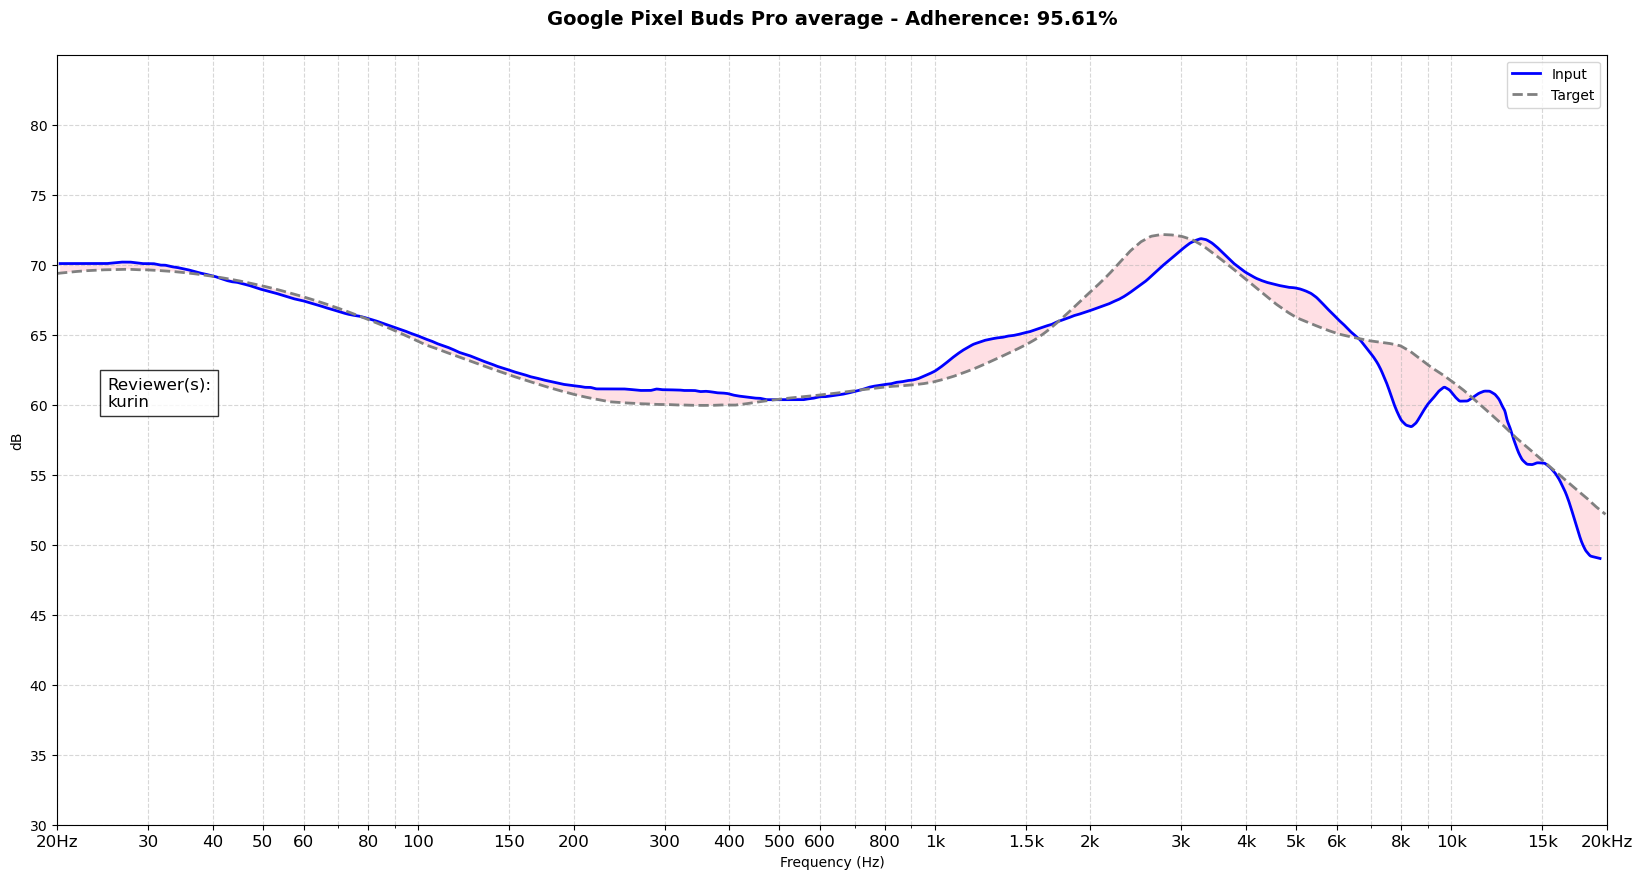

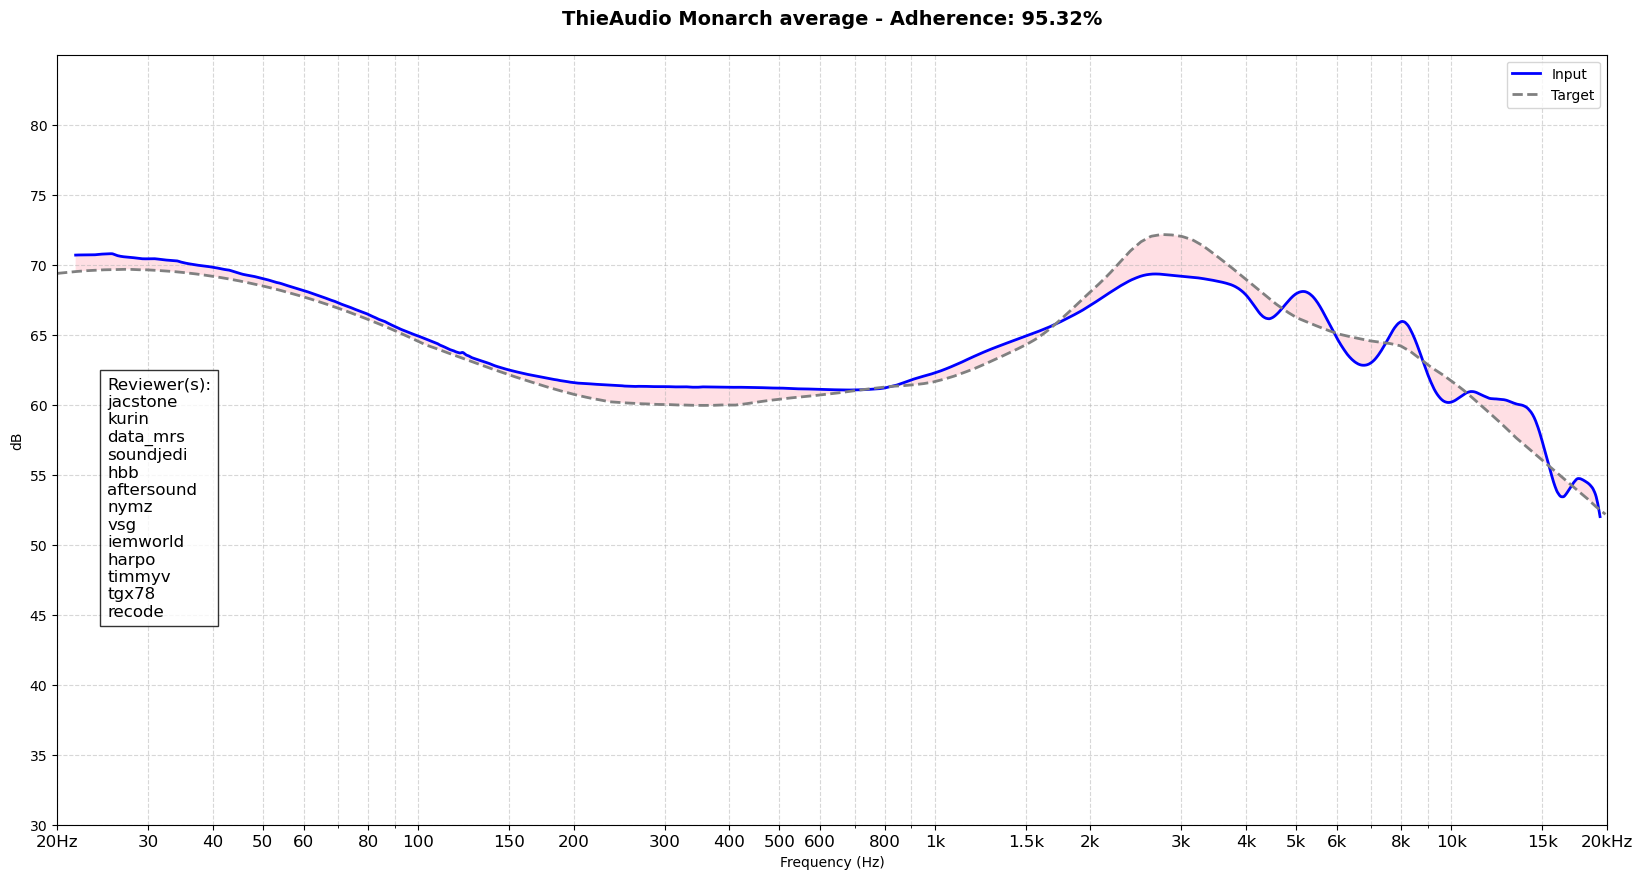

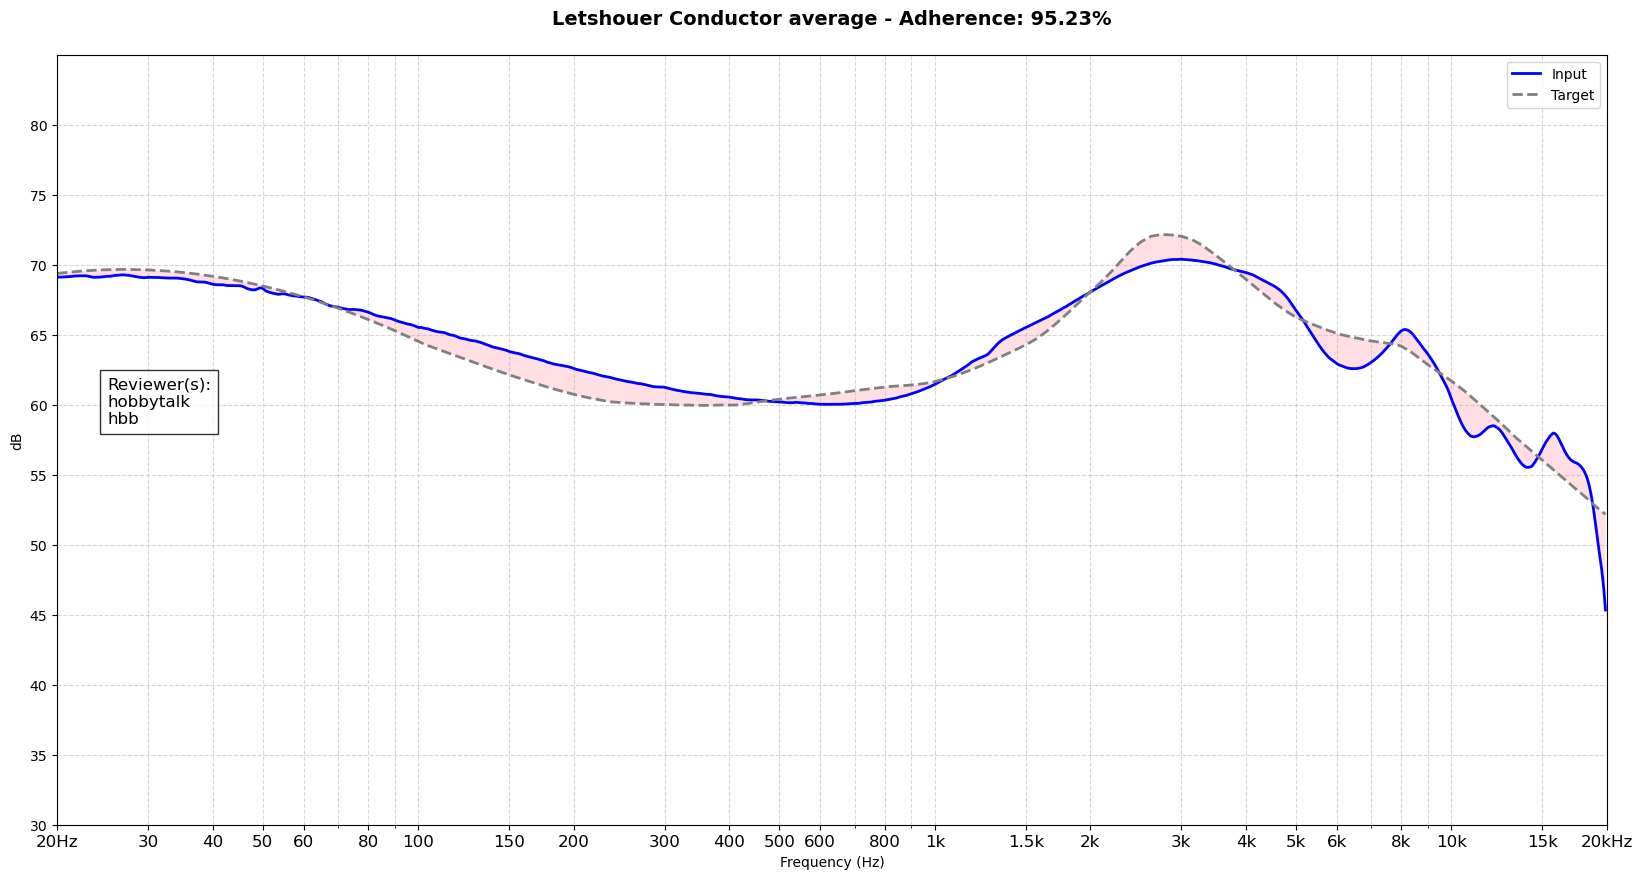

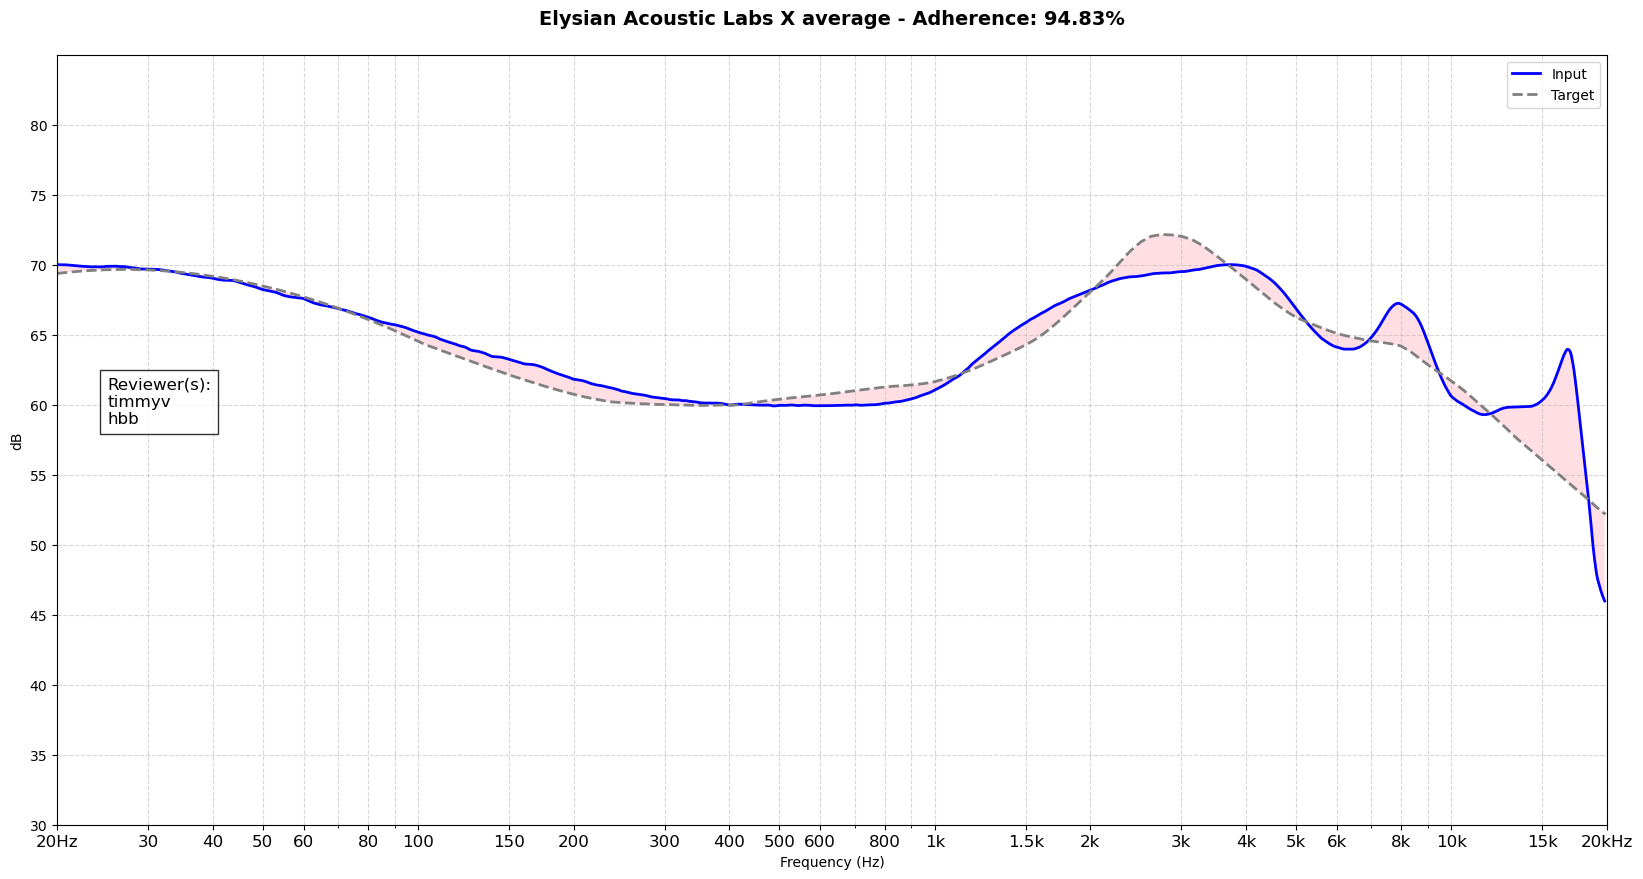

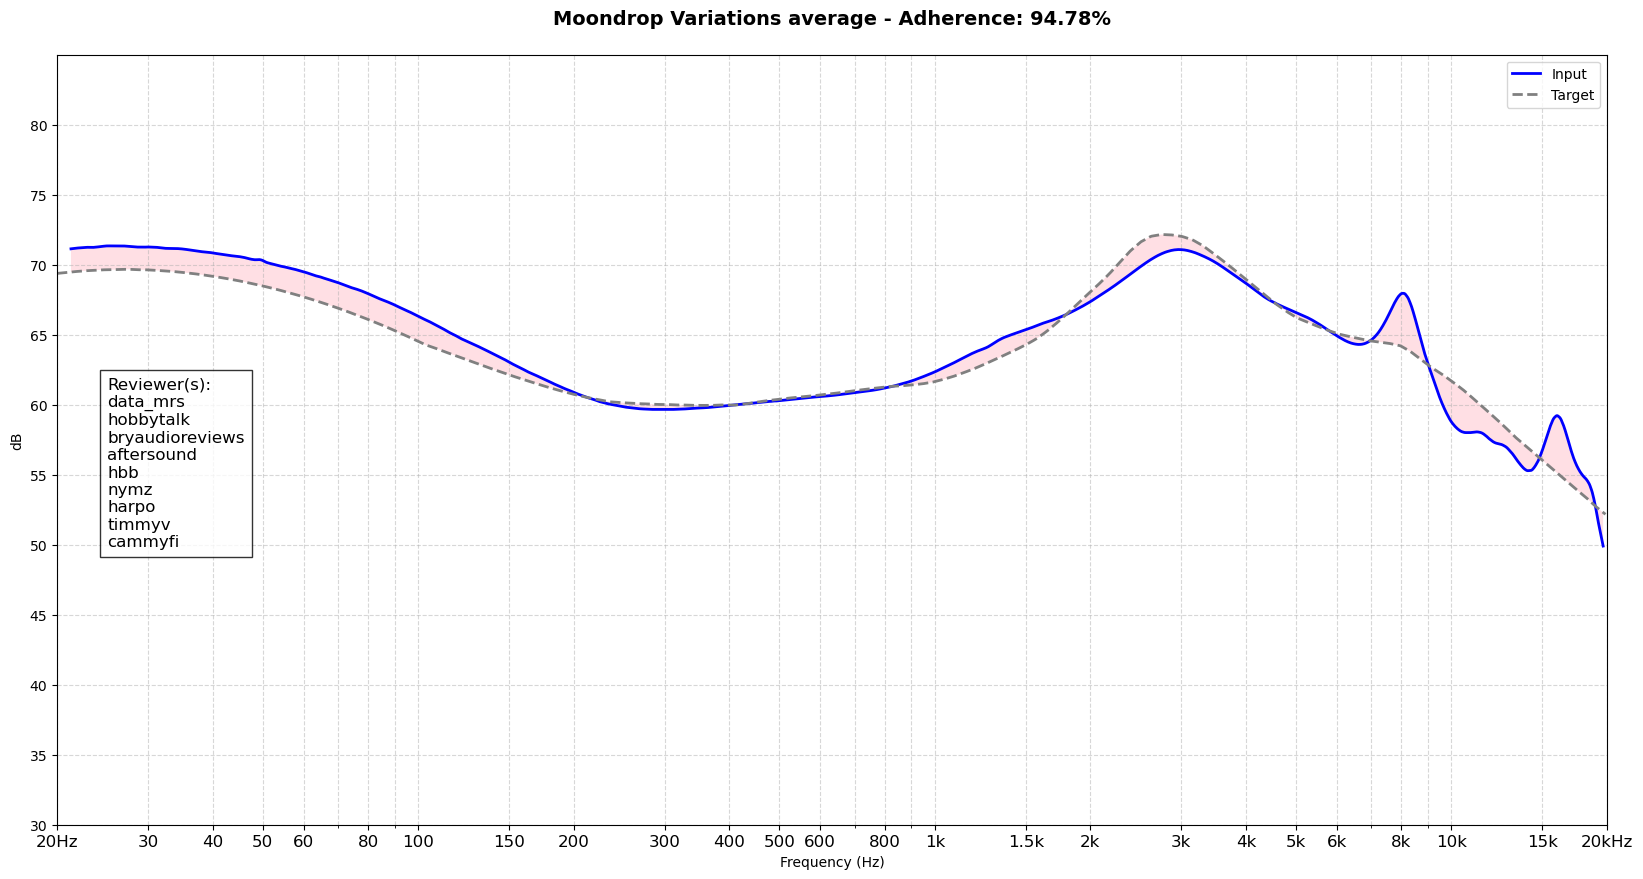

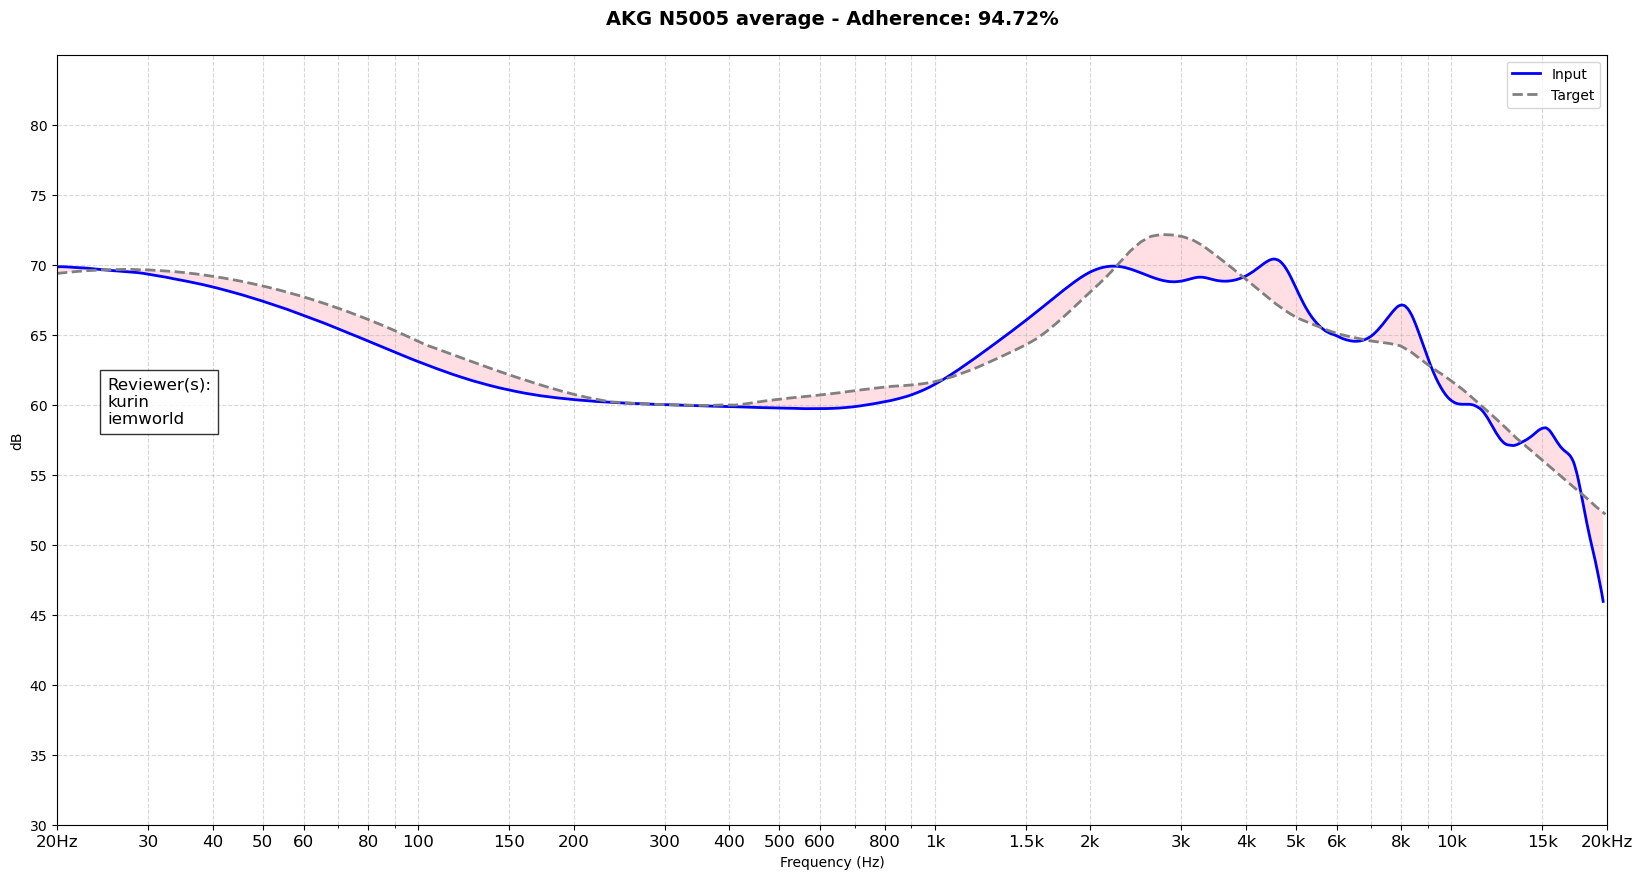

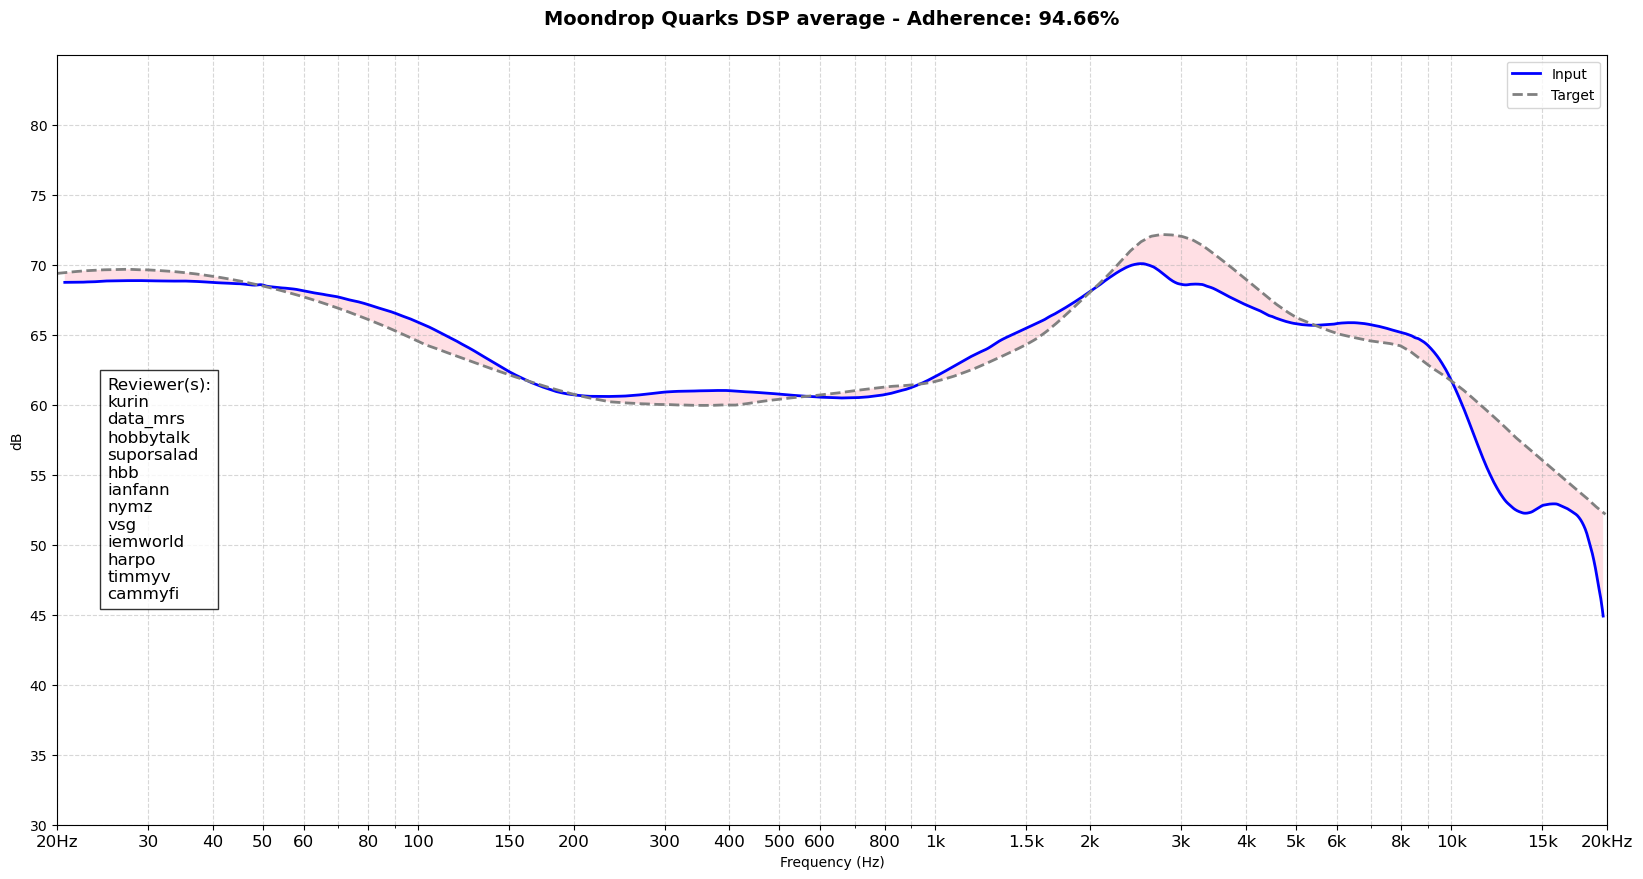

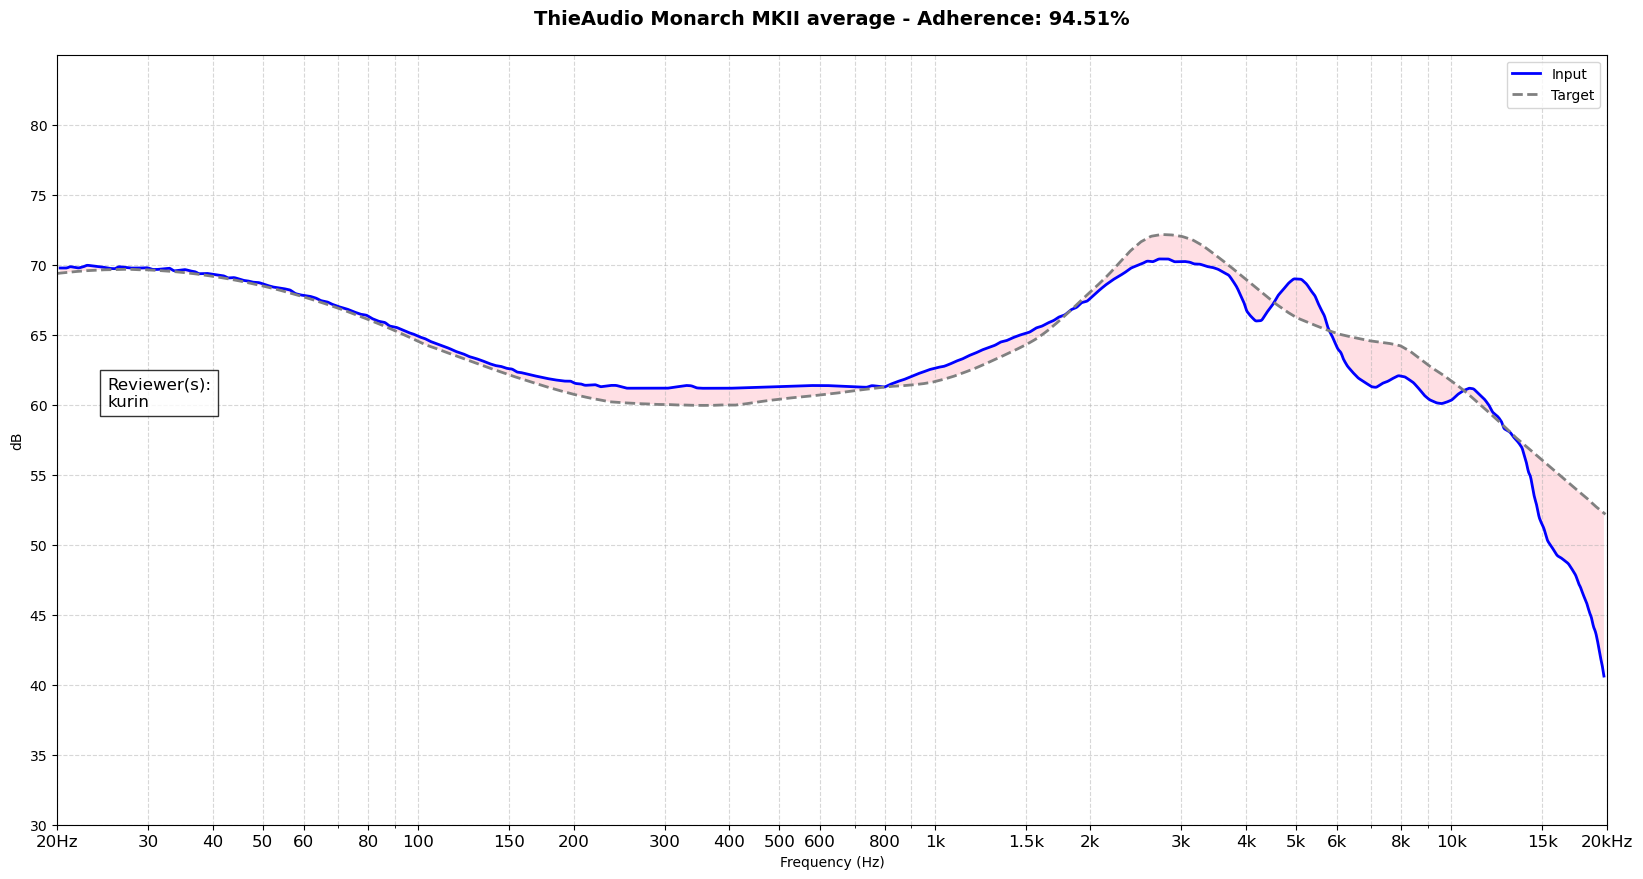

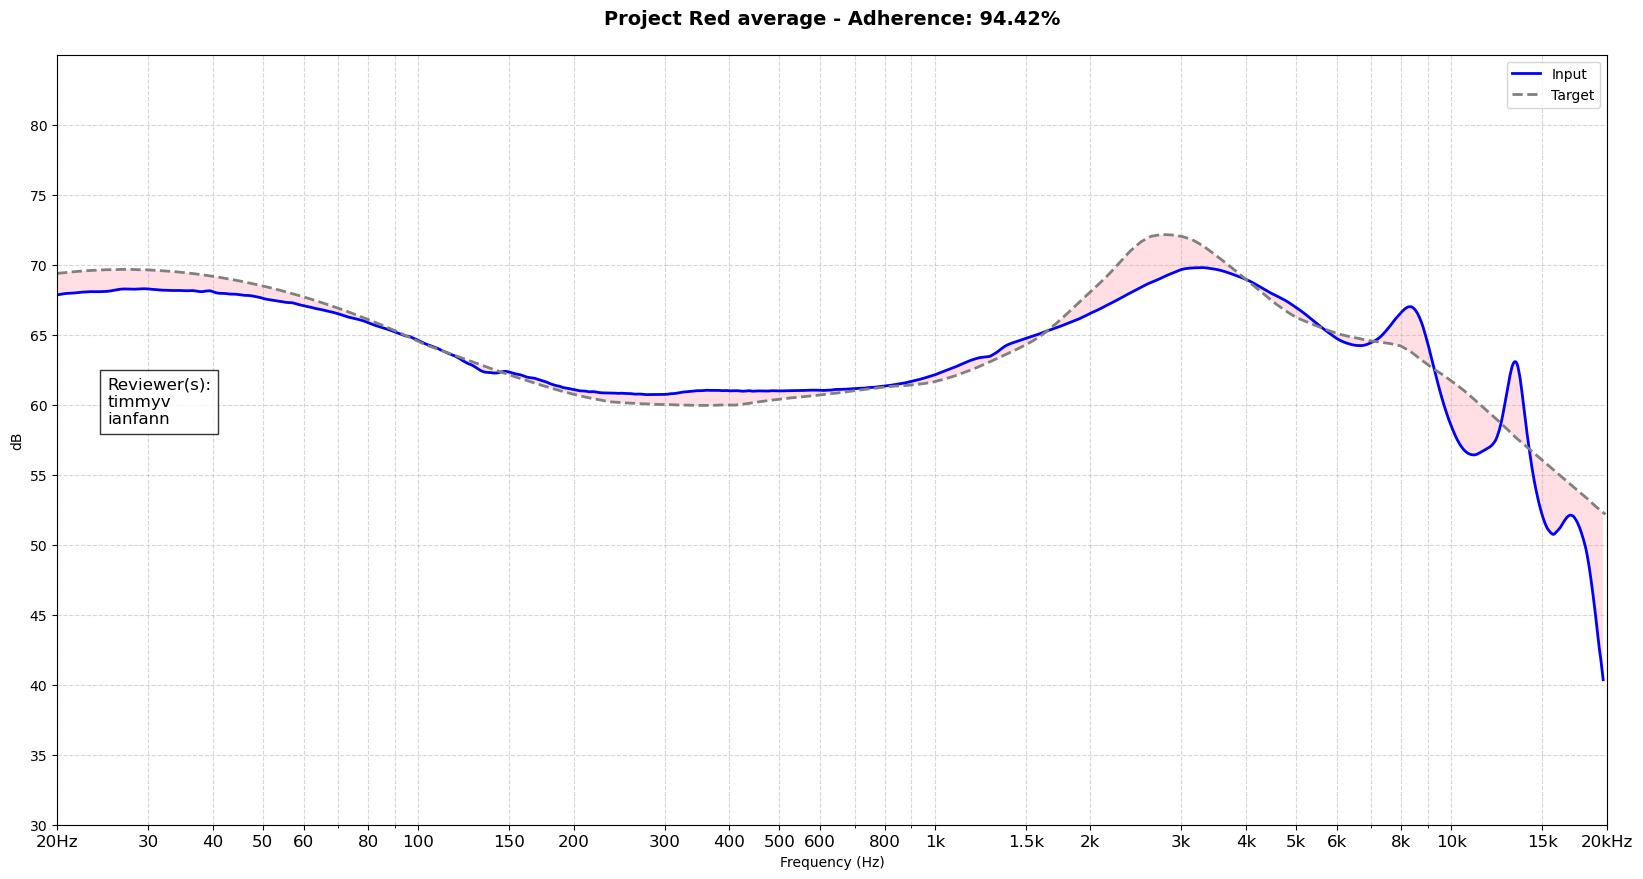

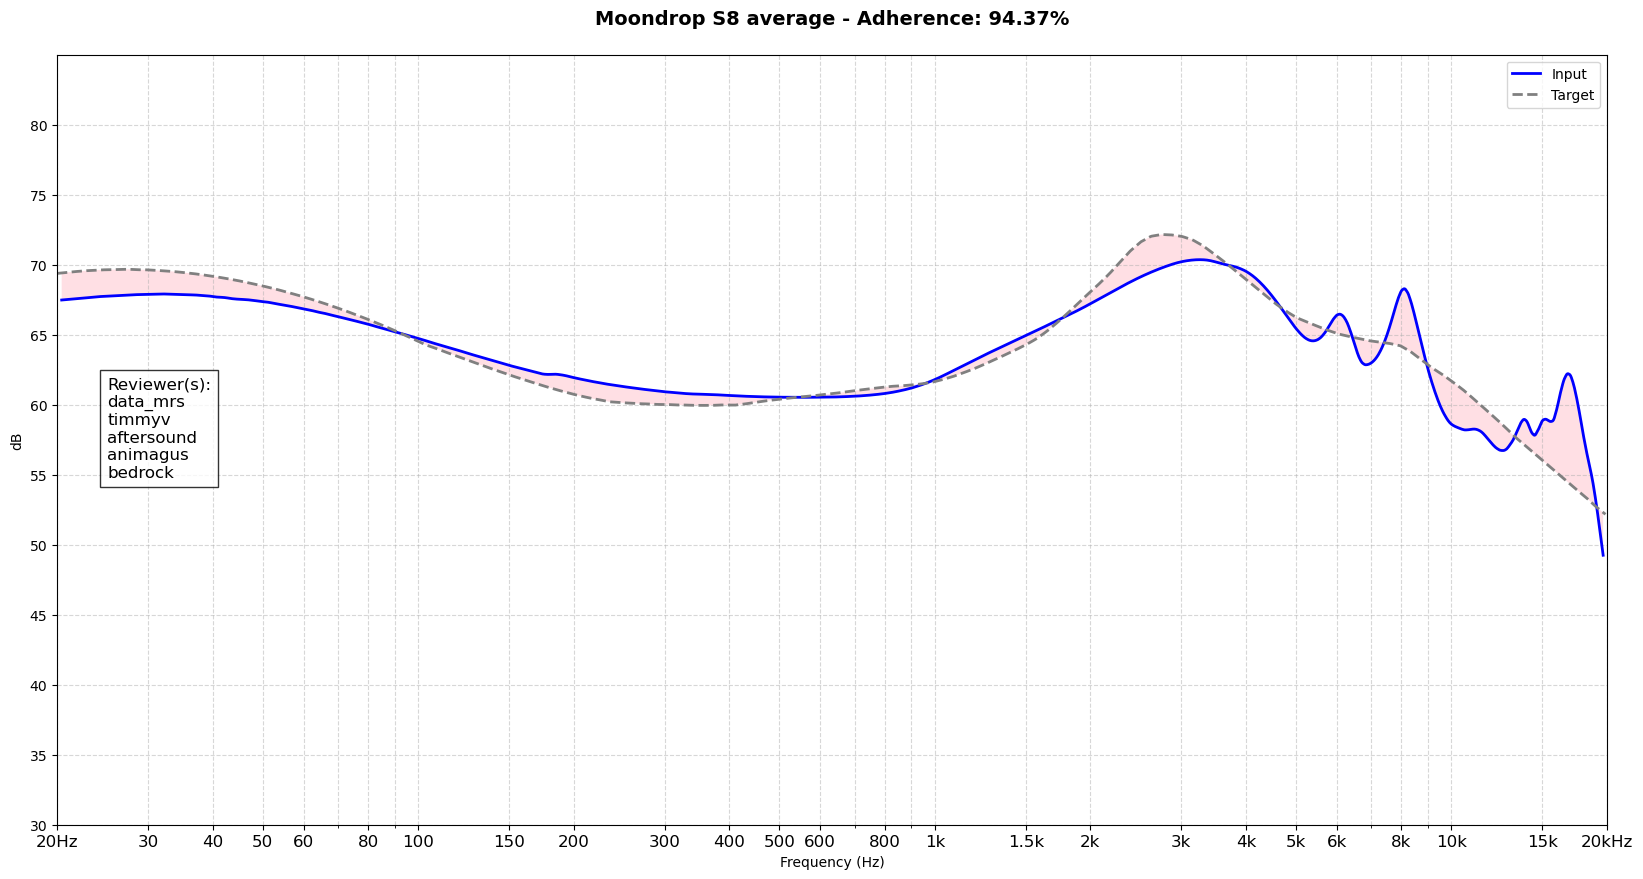

In [133]:
import matplotlib.pyplot as plt

def plot_top_iems(df, top_n=10, target_csv='Objectively Neutral IE Target.csv', colors='blue'):
    top_n_iems = df.head(top_n)
    
    for index, row in top_n_iems.iterrows():
        iem_name = row['IEM Name']
        input_csv = row['Average File Path']
        adherence_percentage = row['Preference %']
        reviewers = row['Reviewers']
        
        plot_preference(input_csv, target_csv, adherence_percentage, colors=colors, reviewers=reviewers)

# Call plot_top_iems function with the DataFrame and the number of top IEMs you want to plot (default is 10)
plot_top_iems(df_sorted, top_n=10)
